In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
base_path = 'D:/Downloads/avazu_feedzai/'

# This file contains data observation for further modelling

In [5]:
# our train set

In [27]:
df = pd.read_csv(base_path + 'train.gz')

In [28]:
# We see that all our variables are categorical

In [29]:
df.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [30]:
### Give a look at the features as they are presented in data

In [31]:
# Let's observe mean CTR values by categorical variables

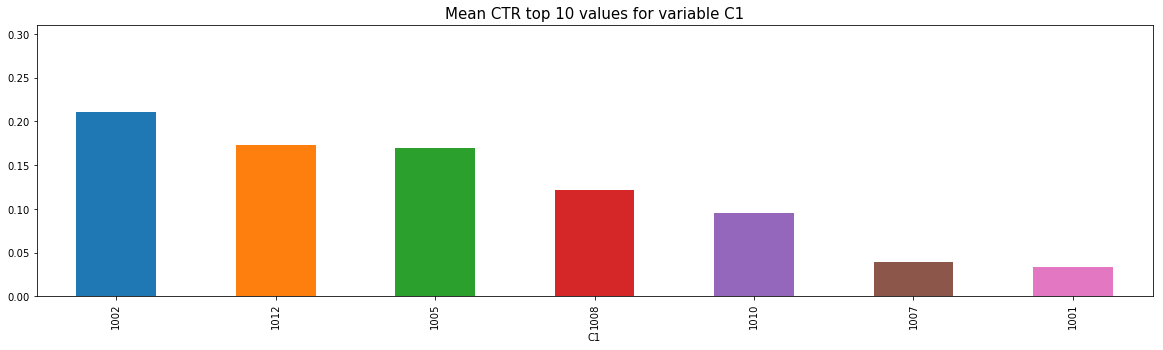

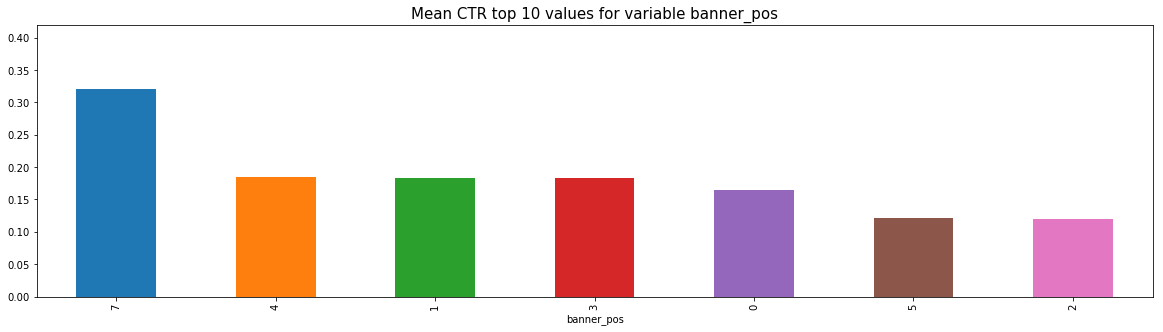

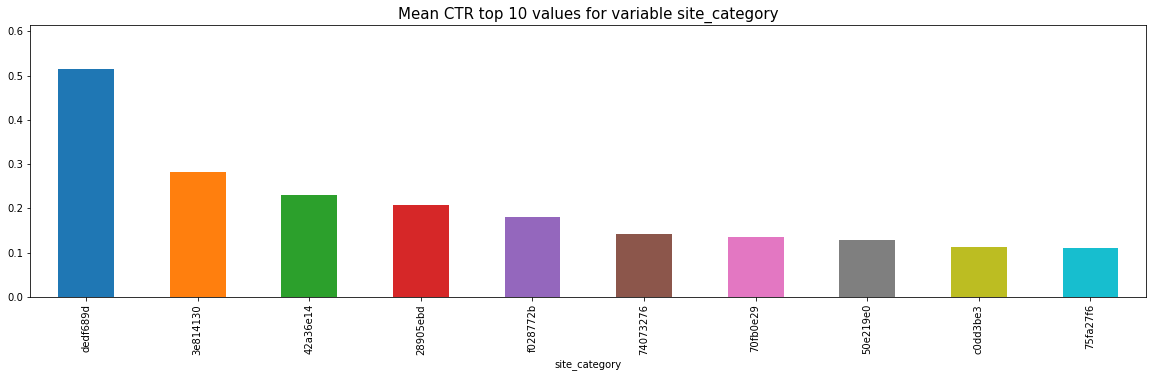

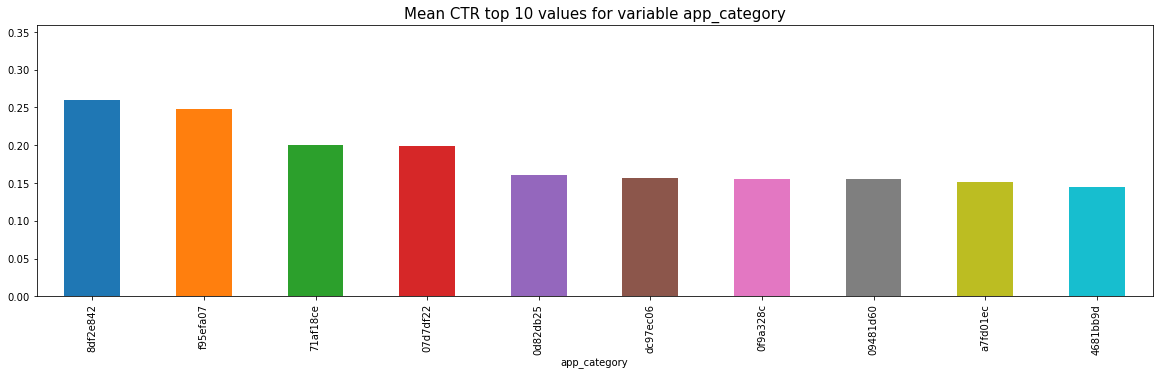

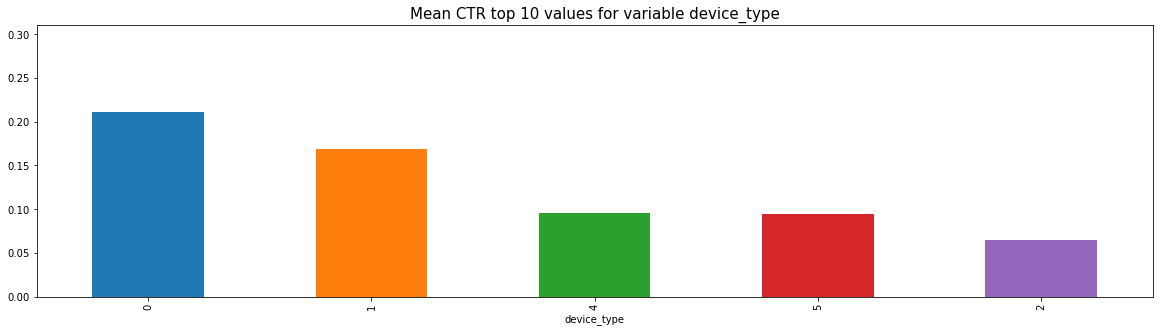

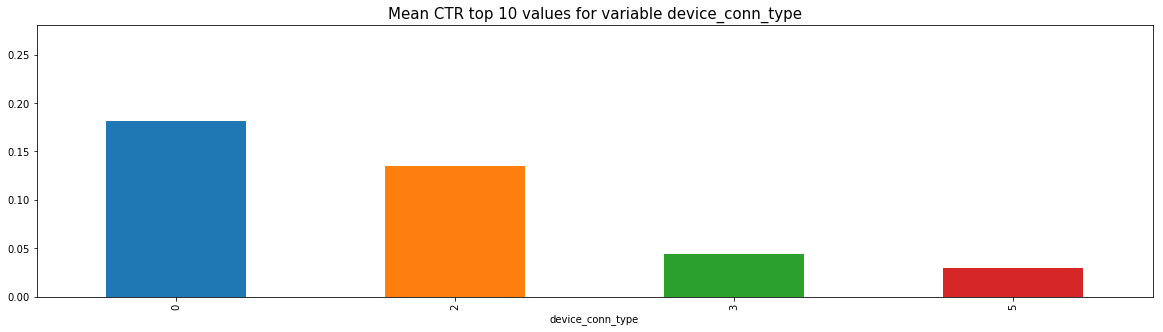

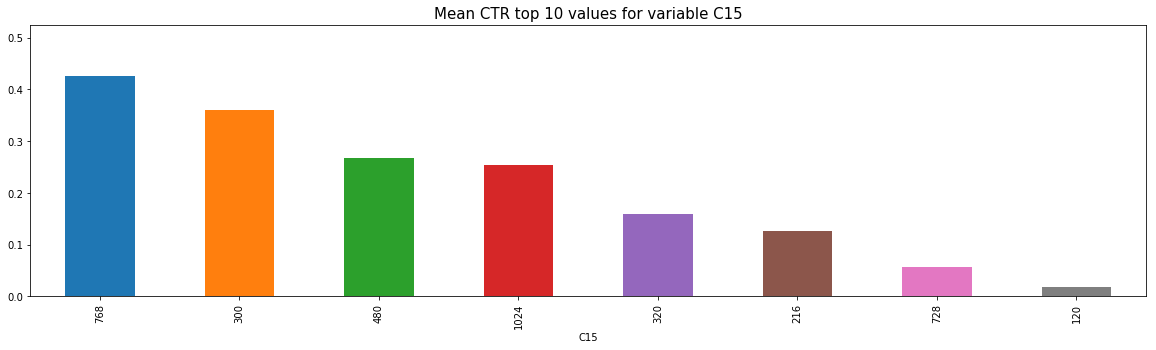

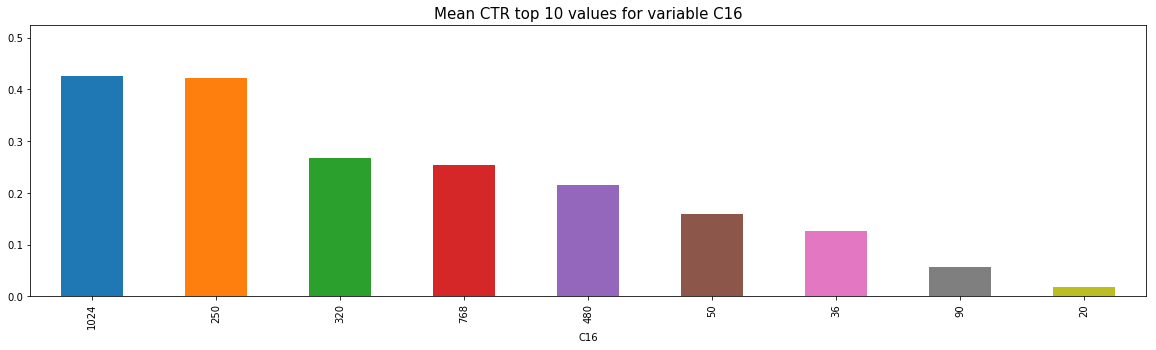

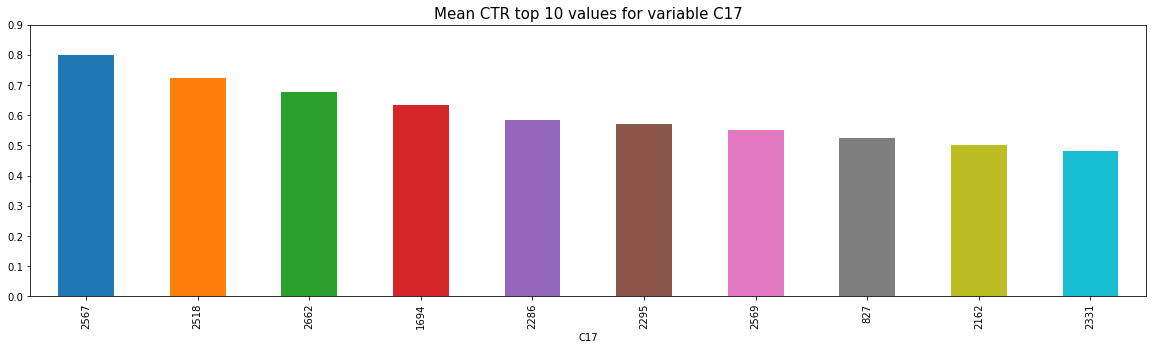

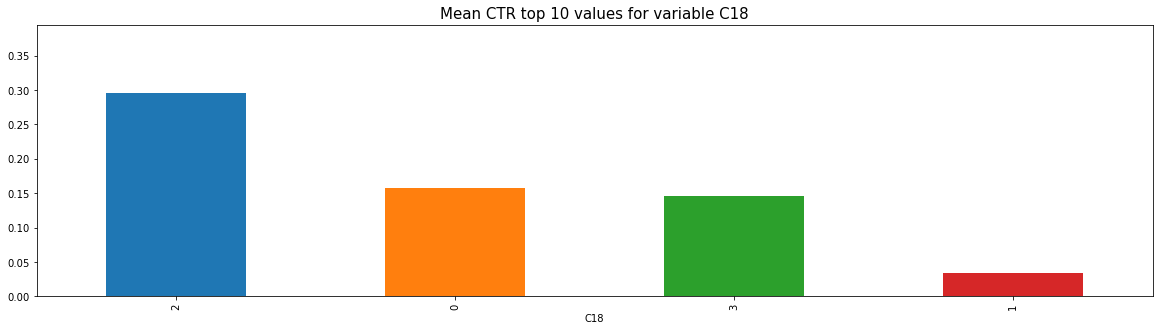

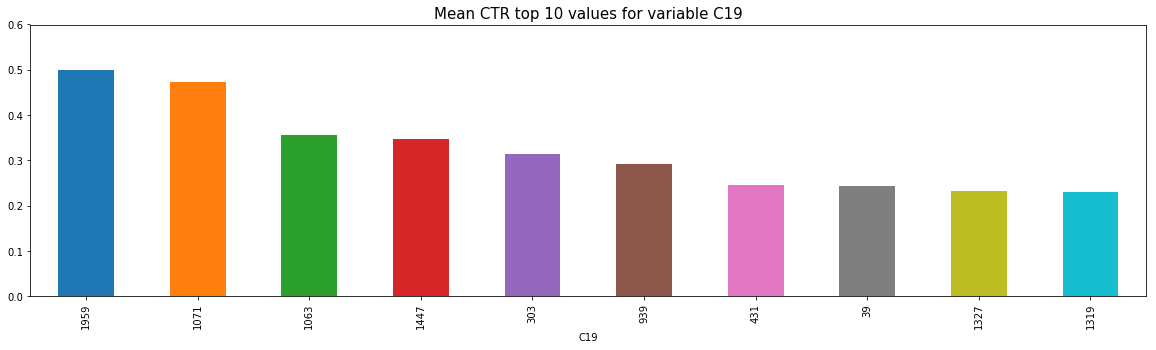

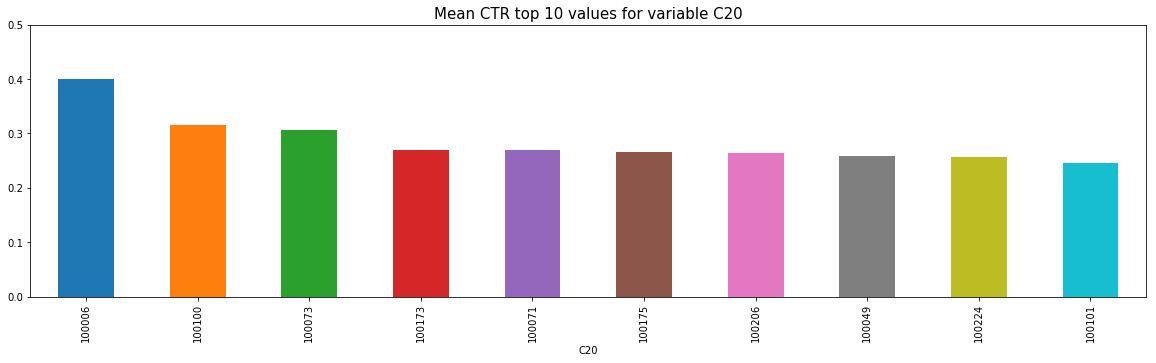

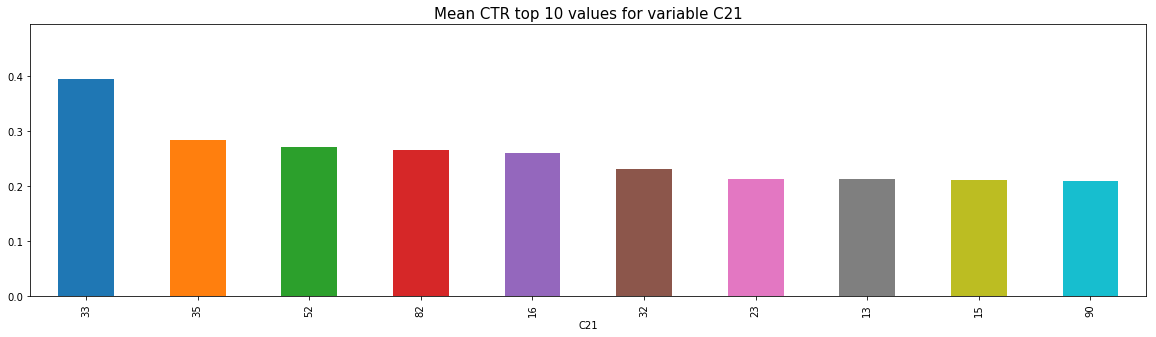

In [32]:
for c in df.columns:
    if c not in ['id', 'click', 'hour', 'device_id', 'device_ip', 'device_model', 'C14'] \
    and 'id' not in c and 'domain' not in c and 'ip' not in c:
        gr = df.groupby(c)['click'].mean().sort_values(ascending = False).head(10)
        ax = gr.plot(kind='bar',  title='Scores', figsize=(20, 5))
        ax.set_ylim(0, np.max(gr.values) + 0.1)
        plt.title('Mean CTR top 10 values for variable %s' %c, fontsize = 15)
        plt.show()

In [33]:
# Variable 'hour' looks interesting. We can take from there the hour itself and also a day

In [34]:
def get_hour(x):
    return int(str(x)[6:])

def get_date(x):
    return int(str(x)[:6])

dict_day = {'21' : 1, '22' : 2, '23' : 3, '24' : 4, '25' : 5, '26' : 6, '27' : 0, '28' : 1, '29' : 2, '30' : 3, '31' : 4}
def get_day(x):
    return dict_day[str(x)[4:6]]

In [35]:
# Let's check if we have a different CTR throug dates

In [36]:
df['date'] = df['hour'].map(get_date)

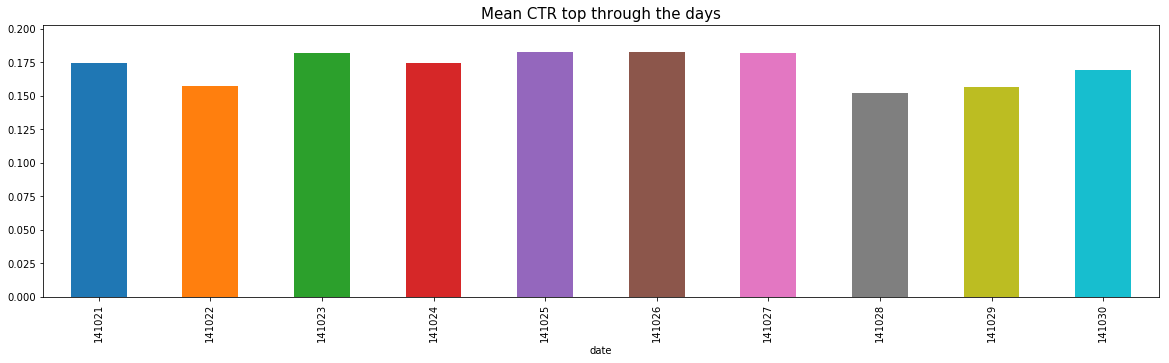

In [37]:
gr = df.groupby('date')['click'].mean()
ax = gr.plot(kind='bar',  title='Scores', figsize=(20, 5))
ax.set_ylim(0, np.max(gr.values) + 0.02)
plt.title('Mean CTR top through the days', fontsize = 15)
plt.show()

In [38]:
# Let's take the day of the hour and check if we have some seasonality

In [39]:
df['real_hour'] = df['hour'].map(get_hour)

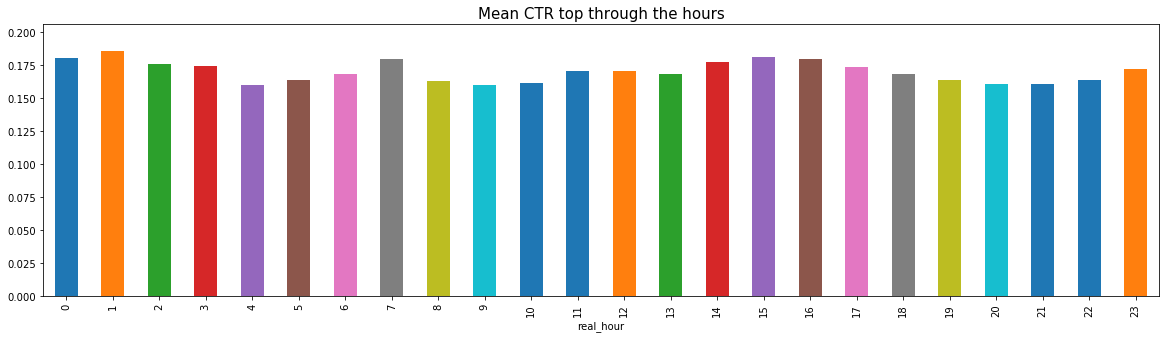

In [40]:
gr = df.groupby('real_hour')['click'].mean()
ax = gr.plot(kind='bar',  title='Scores', figsize=(20, 5))
ax.set_ylim(0, np.max(gr.values) + 0.02)
plt.title('Mean CTR top through the hours', fontsize = 15)
plt.show()

In [41]:
# Let's take the day of the week and check if we have some seasonality

In [42]:
df['day'] = df['hour'].map(get_day)

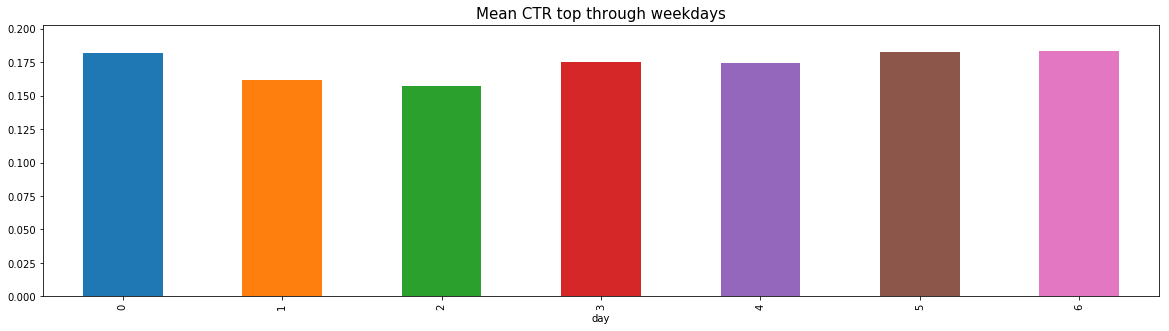

In [43]:
gr = df.groupby('day')['click'].mean()
ax = gr.plot(kind='bar',  title='Scores', figsize=(20, 5))
ax.set_ylim(0, np.max(gr.values) + 0.02)
plt.title('Mean CTR top through weekdays', fontsize = 15)
plt.show()

### Intermediate conclusion => Category features and their combinations really contain information of CTR levels. 'hour' variable should be processed in the way of weekday and hour

# Then I will try to find features which are aligned one to another

In [44]:
# E.g. we see site_id and app_id features which can help us to understand user behaviour

In [45]:
df.groupby('site_id')['click'].count().sort_values(ascending = False).head(10)

site_id
85f751fd    14596137
1fbe01fe     6486150
e151e245     2637747
d9750ee7      963745
5b08c53b      913325
5b4d2eda      771360
856e6d3f      765891
a7853007      461311
b7e9786d      369099
5ee41ff2      349008
Name: click, dtype: int64

In [46]:
df.groupby('app_id')['click'].count().sort_values(ascending = False).head(10)

app_id
ecad2386    25832830
92f5800b     1555283
e2fcccd2     1129016
febd1138      759098
9c13b419      757812
7358e05e      615635
a5184c22      491457
d36838b1      457572
685d1c4c      408515
54c5d545      397693
Name: click, dtype: int64

In [47]:
df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0]

0.3610316583156824

In [48]:
df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]

0.6389683416843176

In [49]:
df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0] + df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]

1.0

# We see that (site_id == 85f751fd) gives 33% of data. For other 67% app_id is constant == ecad2386

# So we can conclude that site_id == 85f751fd means app users, app_id == ecad2386 means mobile users

In [50]:
print('Mean CTR for app users: ', df[df['site_id'] == '85f751fd']['click'].mean())

Mean CTR for app users:  0.11882644017386244


In [51]:
print('Mean CTR for mobile users: ', df[df['site_id'] != '85f751fd']['click'].mean())

Mean CTR for mobile users:  0.19861002453080054


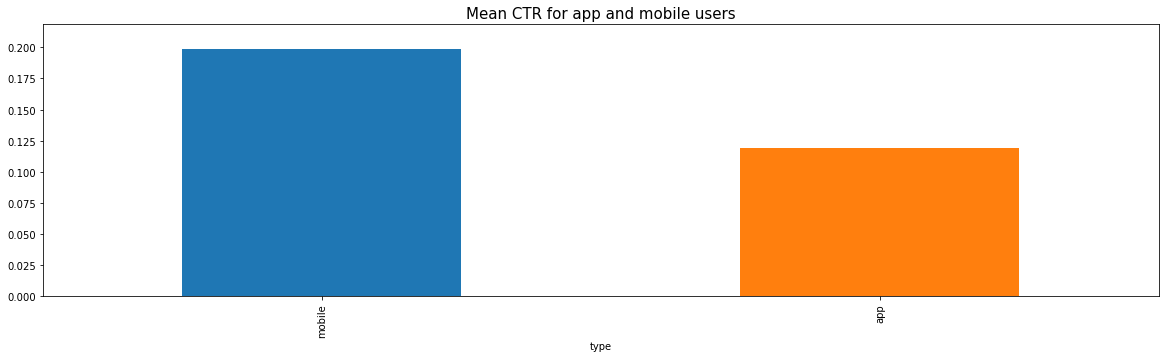

In [52]:
df['type'] = df['site_id'].map(lambda x: 'mobile' if x != '85f751fd' else 'app')
gr = df.groupby('type')['click'].mean().sort_values(ascending = False)
ax = gr.plot(kind='bar',  title='Scores', figsize=(20, 5))
ax.set_ylim(0, np.max(gr.values) + 0.02)
plt.title('Mean CTR for app and mobile users', fontsize = 15)
plt.show()

# COCLUSION

# 1) We have a dataset with only categorical variables with lots of unique values

# 2) CTR for app and mobile users are very different

# I will user factorization machines model which quite good for such data with different models for app and mobile users